Dataset: `mpg` from `seaborn`

Is there a difference between the average mileage of American and European cars? 

In [1]:
import pandas as pd
import seaborn as sns

mpg = sns.load_dataset('mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [2]:
mpg['origin'].unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [3]:
usa = mpg.query('origin == "usa"')
usa.shape

(249, 9)

In [4]:
europe = mpg.query('origin =="europe"')
europe.shape

(70, 9)

<AxesSubplot:xlabel='origin', ylabel='mpg'>

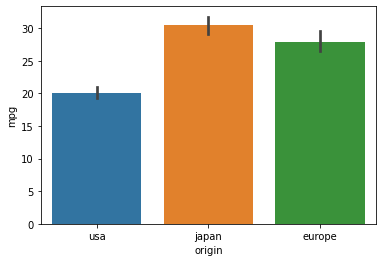

In [5]:
# Make sure to do descriptive statistics first!
sns.barplot(x='origin', y='mpg', data=mpg)

In [6]:
mpg.groupby('origin').describe()['mpg']

,count,mean,std,min,25%,50%,75%,max
origin,,,,,,,,
europe,70.0,27.891429,6.723930,16.2,24.0,26.5,30.65,44.3
japan,79.0,30.450633,6.090048,18.0,25.7,31.6,34.05,46.6
usa,249.0,20.083534,6.402892,9.0,15.0,18.5,24.00,39.0


In [7]:
from scipy import stats
stats.ttest_ind(europe['mpg'], usa['mpg'])

Ttest_indResult(statistic=8.914687150324422, pvalue=3.94517347398542e-17)

<AxesSubplot:xlabel='weight', ylabel='mpg'>

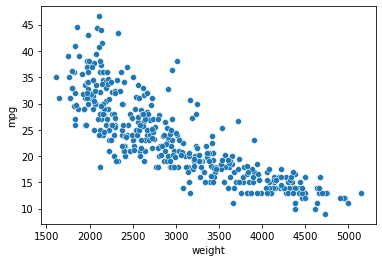

In [8]:
# What about weight and mpg?
sns.scatterplot(x='weight', y='mpg', data=mpg)

In [9]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

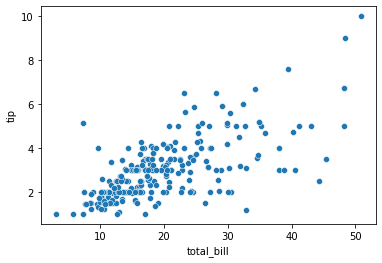

In [10]:
# total_bill comes first in time...
sns.scatterplot(x='total_bill', y='tip', data=tips)

# Looks fairly linear

In [11]:
x = tips['total_bill']
y = tips['tip']

stats.linregress(x, y)

LinregressResult(slope=0.1050245173843534, intercept=0.9202696135546726, rvalue=0.6757341092113641, pvalue=6.692470646864404e-34, stderr=0.007364789848762602, intercept_stderr=0.1597347463764325)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

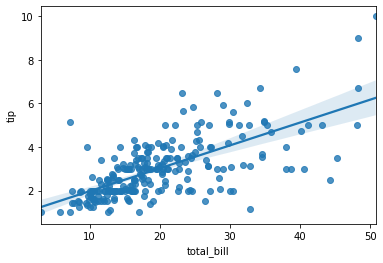

In [14]:
sns.regplot(x, y)

In [15]:
from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics

X_train, X_test, y_train, y_test =  model_selection.train_test_split(tips[['total_bill']], 
                                                                     tips[['tip']], random_state=1234)

In [16]:
y_train.shape

(183, 1)

In [17]:
y_test.shape

(61, 1)

In [18]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

In [19]:
# What % of variability in y is explained by x?
metrics.r2_score(y_test, y_pred)

0.5541275884764633